
# Project: Investigate a Dataset (TMDb movie data)

> **Submitted By**: Vineet Goyal

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>    
<li><a href="#references">References</a></li>    
</ul>

<a id='intro'></a>
## Introduction

> **Overview**: In this project, I will conduct my own data analysis on a TMDb movie dataset (Source : https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv ) and will try to answer out some queries related to this dataset which require a proper analysis before they are answered . I will use pandas and NumPy to answer the questions mentioned below 🠻

> **Question 1**: What is the trend of making profits in movies from year to year ?  

> **Question 2**: Top director that has highest profit in a particular year from 2000 to 2015 ? 

> **Question 3**: How many movies were released each year ?


In [1]:
# This cell is to set up import statements for all of the packages that we require for our analysis

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Info**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


In [2]:
# Loading our data and performimg operations to inspect data

tmdb = pd.read_csv('tmdb-movies.csv') 
tmdb.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<AxesSubplot:>

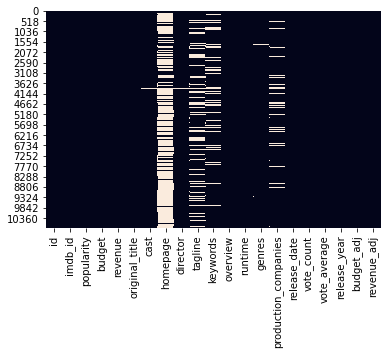

In [4]:
sns.heatmap(tmdb.isnull(), cbar = False)

# This heat maps is best used to see the columns with missing values

## Data Cleaning 

#### Unwanted columns to be removed or altered according to the requirement

In [5]:
del_col = ['id','imdb_id','homepage', 'keywords', 'vote_count', 'vote_average','budget_adj','revenue_adj']
tmdb = tmdb.drop(del_col,1)
tmdb.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

#### Calculate profit and add it as a column

In [6]:
profit_data = tmdb['revenue']- tmdb['budget']
tmdb['profit']= profit_data

#### Now after finishing columns let check for duplicate rows

In [7]:
tmdb.drop_duplicates(keep='first', inplace=True)

#### Check if any required column has missing values or not 

In [8]:
tmdb.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
profit                     0
dtype: int64

#### Confirm data types before proceeding for analysis (Note: Change if any required)

In [9]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   tagline               8041 non-null   object 
 7   overview              10861 non-null  object 
 8   runtime               10865 non-null  int64  
 9   genres                10842 non-null  object 
 10  production_companies  9835 non-null   object 
 11  release_date          10865 non-null  object 
 12  release_year          10865 non-null  int64  
 13  profit                10865 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 1.2+ MB


In [10]:
tmdb['release_date']=tmdb['release_date'].apply(pd.to_datetime)

In [11]:
tmdb.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01   

   release_year      profit  
0          2015  1363528810  
1          2015   228436354  
2          2015   185238201  
3          2015  1868178225  
4          2015  1316249360

<a id='eda'></a>
## Exploratory Data Analysis

> **Info**: Now that we have trimmed and cleaned your data, we are ready to move on to exploration. We will compute statistics and create visualizations with the goal of addressing the research questions that i posed in the Introduction section.

### Research Question 1 ( What is the trend of making profits in movies from year to year ? )

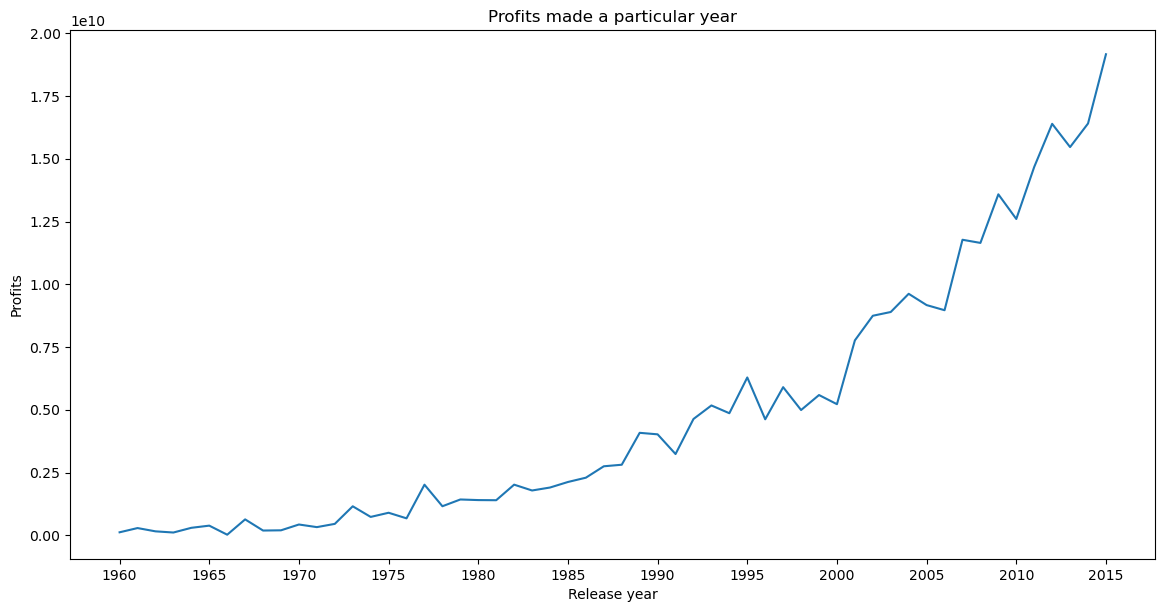

In [12]:
# Group profit with release year as a sum
data = tmdb.groupby('release_year')['profit'].sum()

# Graphical representation of query
plt.figure(figsize=(14,7), dpi=100)
plt.xlabel('Release year')
plt.ylabel('Profits')
plt.title('Profits made a particular year')
plt.plot(data)
years=[]
for i in range(0,12):
    year = 1960 + (5 * i)
    years.append(year)
plt.xticks(years)
plt.show()


# Line chart is used in this query as in a line chart we can clearly see a dip or rise in the values from one to another
# so it is used in this, thus which cleary shows the pattern whether the profit increased or decreased in respect to previous or later value

### Research Question 2  ( Top director that has highest profit in a particular year from 2000 to 2015 ? )

In [13]:
directors = list(tmdb['director'])
profits = list(tmdb['profit'])
years = list(tmdb['release_year'])

# Making a data frame consisting directors and their profits with year  

top_directors = pd.DataFrame()
top_directors['directors']=directors
top_directors['profits']=profits
top_directors['years']=years

# To filter out entries with null values in profits
top_directors.dropna(inplace=True)

# To group directors with profits in a particular year 
td = top_directors.groupby(['directors','years'],as_index=False).profits.sum()
director1 = []
year = []

# find the top directors in a particular year
for i in range(2000,2016):
    
    td1 = pd.DataFrame(td)
    td1['directors'] = td1['directors'].astype(str)
    td1['years'] = td1['years'].astype(str)
    td1['profits'] = td1['profits'].astype(int)
    limit = str(i)
    td1 = td1.query('years == @limit')
    director1.append(td1['directors'][td1['profits'].idxmax()])
    year.append(limit)

# Making DataFrame
top1_directors = pd.DataFrame()
top1_directors['Highest_profit_making_Director'] = director1
top1_directors['In_Year'] = year

# Displaying DataFrame
top1_directors.style\
              .hide_index()\
              .set_properties(**{'background-color': 'Black',
                                'color' : 'yellow',
                                'border-color':'white'})


# In this query the outcome is presented in a table format because in this we need to presented the names as a outcome
# And names can not be visualized on a graph for proper view, so table format as an outcome was best suited

### Research Question 3  ( How many movies were released each year ? )

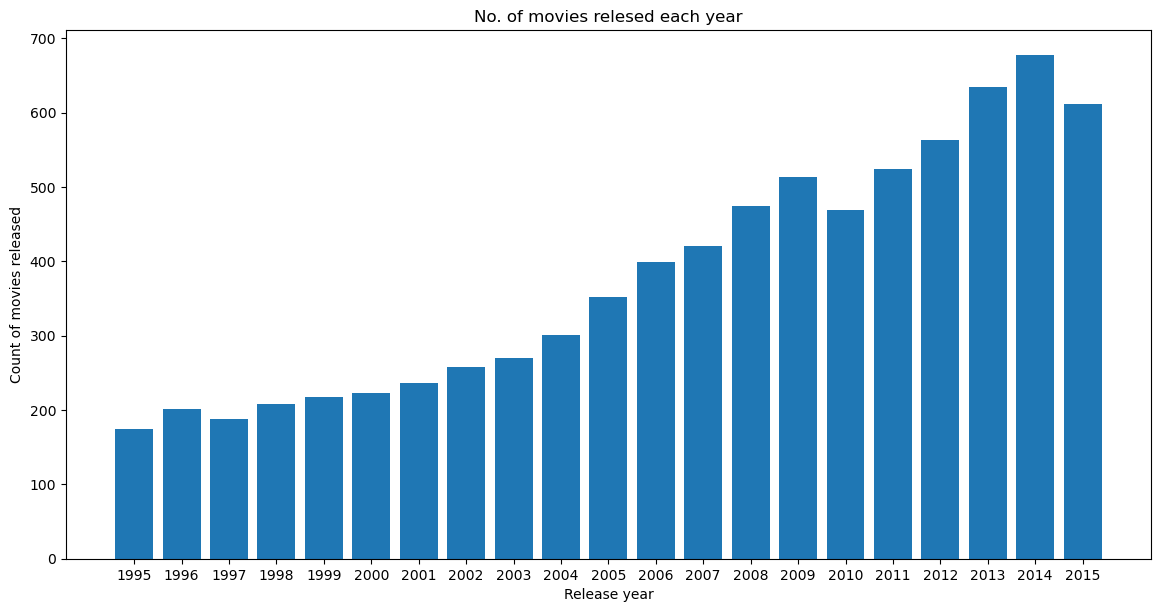

In [14]:
no_of_releases = []
year = []

# Find the count of movies released each year
for i in range(1995,2016):
    
    count = pd.DataFrame(td)
    count['No. of releases'] = tmdb['release_year']
    limit = str(i)
    count = count.query('years == @limit')
    no_of_releases.append(count['No. of releases'].count())
    year.append(limit)

# Making DataFrame
releases_df = pd.DataFrame()
releases_df['No. of releases'] = no_of_releases
releases_df['In_Year'] = year

# Displaying DataFrame
releases_df.style.hide_index()


plt.figure(figsize=(14,7), dpi=100)
plt.xlabel('Release year')
plt.ylabel('Count of movies released')
plt.title('No. of movies relesed each year')
plt.bar(releases_df['In_Year'],releases_df['No. of releases'])
plt.show()


# In this query the end point is presented in a bar graph format because bar graphs are best show frequency distribution
# and also because bar graphs are easy to read and easy to compare two different values as a bar

<a id='conclusions'></a>
## Conclusions

> **Research Query 1**: With passing each year there is an continuous increase in profits made by movies, so its a good opportunity to enter into film making business in future or present.

> **Research Query 2**: From a record of last 15 years (2000-2015) we can see that a director named "Peter Jackson" has shown his presence three times for making highest profit in a year. So there are great chances for making profit in the movies directed by "Peter Jackson"

> **Research Query 3**: With a continuous high increase in count of movies being released each year, we can expect a high competion in this market to survive.


<a id='limitations'></a>
## Limitations

> **Limitation 1**: In my first query, profits trends are visualized but no other parameters are considered in analysis that affect the results like how many movies were released in that year which affect the calculation of profits of that particular year.  

> **Limitation 2**: Table as an outcome in second query still requires some manual efforts to study the outcome table to gather the results. Scope of vision is limited from year 2000 to 2015.

> **Limitation 3**: In third query, if no. of movies released each year would have been justified on the basis of genre it would have given a more clear picture to study the movie release evolution .


<a id='references'></a>
## References
> **To draw heat map using seaborn**: 
https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj


> **To convert object dtype to datetime**: 
https://stackoverflow.com/questions/16852911/how-do-i-convert-strings-in-a-pandas-data-frame-to-a-date-data-type

> **To visualize the data frame output in 2nd query**: 
https://pandas.pydata.org/pandas-docs/version/0.18.1/style.html